## Goal:
Get a summary of the data

In [1]:
from scipy import sparse
from scipy.io import mmread
import numpy as np
import time
import matplotlib.pyplot as plt  

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
data_dir = "../../text_dataset/"
data_name = "kos"
# count_name = "docword.{}.mtx".format(data_name)
# vocab_name = "vocab.{}.txt".format(data_name)

def load_data(data_name,data_dir = "../../text_dataset/"):
    count_name = "docword.{}.mtx".format(data_name)
    vocab_name = "vocab.{}.txt".format(data_name)
    print("dataname: {}\n".format(data_name))
    #print("load counts")
    start = time.time()
    counts = mmread("{}{}".format(data_dir, count_name))
    runtime = time.time() - start
    print("data loaded after {:.3} seconds".format(runtime))
    (n,p) = counts.shape
    print("data shape: n_sample= {}; n_feature={}".format(n, p))
    nnzero = len(np.nonzero(counts)[0])
    print("percentage of nonzero: {:.3}".format(nnzero/(n*p)))
    sent_len_ave = counts.data.sum()/n
    print("average sentence length: {:.3}\n".format(sent_len_ave))
    ## load vocab
    #print("load vocab")
    vocab = []
    with open("{}{}".format(data_dir, vocab_name), "r") as f:
        for line in f:
            vocab.append(line.split()[0])
    #print("vocab size :{}".format(len(vocab)))
    return counts, vocab

def plot_hist_nonzero(counts, bins = 20):
    plt.hist(np.log10(counts.data),bins = bins)
    #plt.hist(counts.data, bins = 20)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel("counts (log10)")
    plt.ylabel("frequency")
    plt.title("histogram of nonzero counts in log 10 scale")
    plt.show()
    
def show_top_word(counts,vocab, decreasing = True, n_top = 10, bins = 20):
    (p,n) = counts.shape
    total_count_word = counts.sum(axis = 0).tolist()[0]
    word_ind = np.argsort(total_count_word)
    if decreasing:
        word_ind = word_ind[::-1]
        title = "average count for most frequent words:"
    else: 
        title = "average count for least frequent words:"
    n_top = n_top
    print("{}".format(title))
    for i in word_ind[:n_top]:
        print("{}: {}".format(vocab[i], total_count_word[i]/n))
    
    top_word = word_ind[0]
    top_word_dist = counts.getcol(top_word).toarray()
    plt.hist(top_word_dist,bins = bins)
    plt.title("distribution of word `{}`".format(vocab[top_word]))
    plt.show()
    
def show_summary(data_name,data_dir = "../../text_dataset/", bins = 20):
    counts, vocab = load_data(data_name, data_dir)
    print("show histogram of nonzero counts:\n")
    plot_hist_nonzero(counts, bins = bins)
    print("show most frequent words:\n")
    show_top_word(counts,vocab, decreasing = True, n_top = 10, bins = bins)
    print("show least frequent words:\n")
    show_top_word(counts,vocab, decreasing = False, n_top = 10, bins = bins)
    

## "enron"

dataname: enron

data loaded after 5.19 seconds
data shape: n_sample= 39861; n_feature=28102
percentage of nonzero: 0.00331
average sentence length: 1.61e+02

show histogram of nonzero counts:



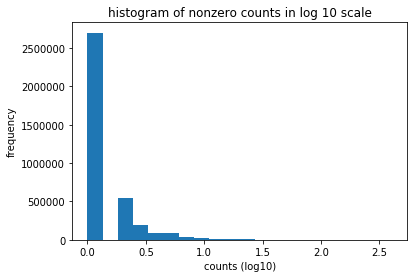

show most frequent words:

average count for most frequent words:
power: 1.1737598747420113
company: 1.1428012241121628
energy: 0.9972243968400826
market: 0.8864137783787631
california: 0.8702583446018077
business: 0.6036225179702512
customer: 0.5802789837022276
meeting: 0.5712048964486514
plan: 0.5633406874955519
electricity: 0.5320617749626361


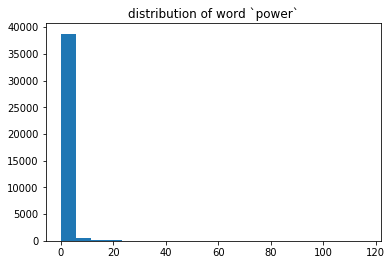

show least frequent words:

average count for least frequent words:
entryevent: 0.0
meeting4102: 0.0
days1: 0.0
lynnout: 3.5584655896377484e-05
am1000: 3.5584655896377484e-05
mtgraetta: 3.5584655896377484e-05
gasdoc: 7.116931179275497e-05
pm300: 7.116931179275497e-05
pm230: 7.116931179275497e-05
julias: 7.116931179275497e-05


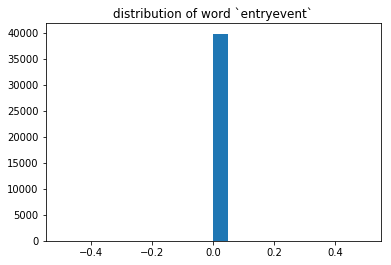

In [3]:
show_summary("enron")

## "kos"

dataname: kos

data loaded after 0.544 seconds
data shape: n_sample= 3430; n_feature=6906
percentage of nonzero: 0.0149
average sentence length: 1.36e+02

show histogram of nonzero counts:



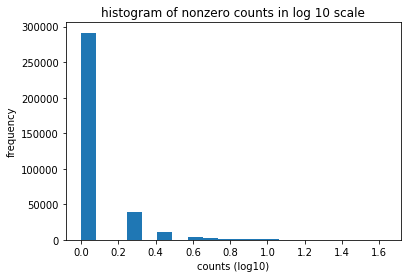

show most frequent words:

average count for most frequent words:
bush: 0.9818997972777295
kerry: 0.677526788300029
november: 0.5474949319432377
poll: 0.3822762814943527
democratic: 0.3715609614827686
house: 0.3547639733565016
war: 0.3423110338835795
general: 0.32609325224442515
iraq: 0.3210251954821894
campaign: 0.2884448305821025


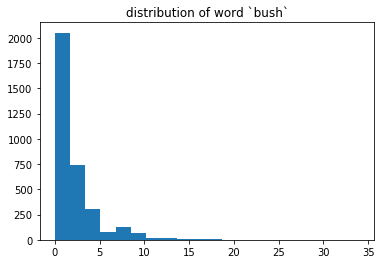

show least frequent words:

average count for least frequent words:
predebate: 0.0008688097306689834
zahn: 0.0008688097306689834
auxiliary: 0.0008688097306689834
chit: 0.0011584129742253113
bug: 0.0011584129742253113
weekends: 0.0011584129742253113
dept: 0.0011584129742253113
labors: 0.0011584129742253113
parentheses: 0.0011584129742253113
lament: 0.0011584129742253113


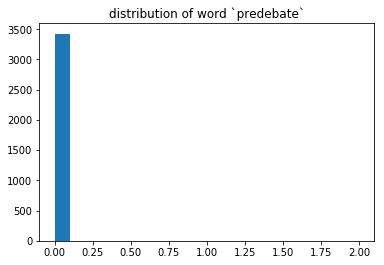

In [4]:
show_summary("kos")

## "nips"

dataname: nips

data loaded after 1.11 seconds
data shape: n_sample= 1500; n_feature=12419
percentage of nonzero: 0.0401
average sentence length: 1.29e+03

show histogram of nonzero counts:



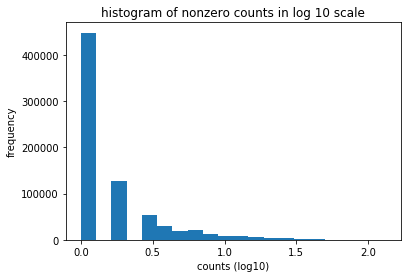

show most frequent words:

average count for most frequent words:
network: 2.091714308720509
model: 1.5029390450116757
learning: 1.2943876318544165
function: 1.1839922699090104
input: 1.1267412835171915
neural: 1.0199694017231662
set: 0.9402528383927853
algorithm: 0.9058700378452371
system: 0.8918592479265641
data: 0.8875915935260488


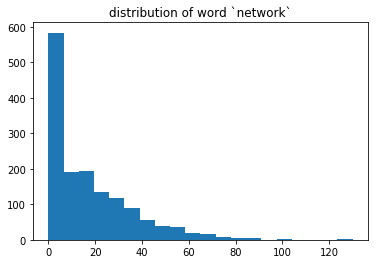

show least frequent words:

average count for least frequent words:
rainfall: 0.0
ennis: 0.0
autotypist: 0.0
agrin: 0.0
ovarian: 0.0
chewing: 0.0
achr: 0.0
chl: 0.0
ossicles: 0.0
autorsm: 0.0


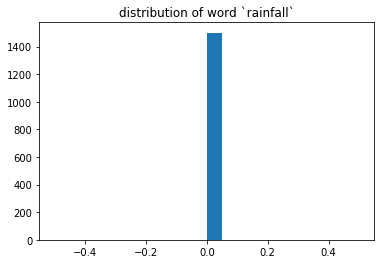

In [ ]:
show_summary("nips")

## "nytimes"

In [ ]:
show_summary("nytimes")

dataname: nytimes



## "pubmed"

In [ ]:
show_summary("pubmed")